# 1. Using VGG16 as a convolutional basis for the fashion mnist dataset.

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers

In [21]:
# Load dataset Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


In [22]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [23]:
# Changing the image dimension to 32x32
train_images = tf.image.resize(train_images[..., tf.newaxis], [32, 32])
test_images = tf.image.resize(test_images[..., tf.newaxis], [32, 32])

In [24]:
# Increasing the number of channels in images from 1 to 3
train_images = tf.repeat(train_images, 3, axis=-1)
test_images = tf.repeat(test_images, 3, axis=-1)
print(train_images.shape)
print(test_images.shape)

(60000, 32, 32, 3)
(10000, 32, 32, 3)


In [25]:
# Normalize pixel values ​​to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [26]:
# Creating a data generator object with augmentation parameters for training data
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator for training set
train_generator = train_datagen.flow(train_images, train_labels, batch_size=64)

# Data generator for validation set without augmentation
validation_datagen = ImageDataGenerator()

# Data generator for validation set
validation_generator = validation_datagen.flow(test_images, test_labels, batch_size=64)

In [27]:
# Load VGG16
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

In [28]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [29]:
# Model definition
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

In [30]:
# Modelcompilation
model.compile(
    loss="sparse_categorical_crossentropy", # Зміна на sparse_categorical_crossentropy для багатокласової класифікації
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["accuracy"]
)

In [31]:
# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.1058 - loss: 2.3856 - val_accuracy: 0.1338 - val_loss: 2.2961
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.1830 - loss: 2.2665 - val_accuracy: 0.2697 - val_loss: 2.1692
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.2624 - loss: 2.1526 - val_accuracy: 0.3428 - val_loss: 2.0813
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.3753 - loss: 2.0494 - val_accuracy: 0.3950 - val_loss: 2.0029
Epoch 5/30
 9/50 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4298 - loss: 1.9820

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.4312 - loss: 1.9716 - val_accuracy: 0.4916 - val_loss: 1.9002
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.4963 - loss: 1.8906 - val_accuracy: 0.5450 - val_loss: 1.8278
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5471 - loss: 1.8175 - val_accuracy: 0.5759 - val_loss: 1.7527
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.5390 - loss: 1.7688 - val_accuracy: 0.6825 - val_loss: 1.6520
Epoch 9/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5750 - loss: 1.6990 - val_accuracy: 0.6081 - val_loss: 1.6331
Epoch 10/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.5808 - loss: 1.6388 - val_accuracy: 0.6172 - val_loss: 1.5798
Epoch 11/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5991 - loss: 1.5965 - val_accuracy: 0.6172 - val_loss: 1.5269
Epoch 12/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6249 - loss: 1.5230 - val_accuracy: 0.6300 - val_loss:

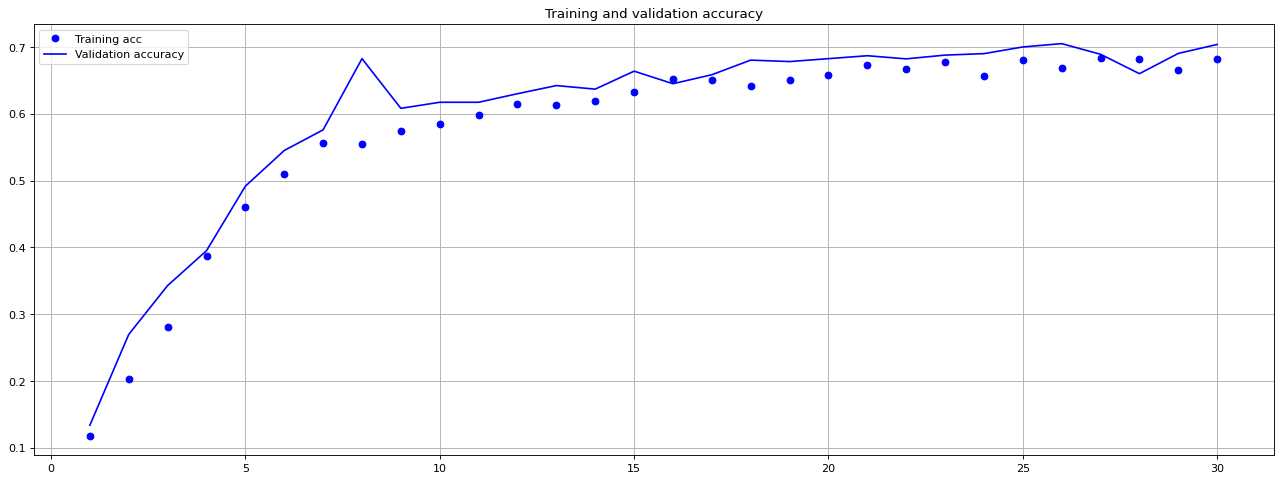

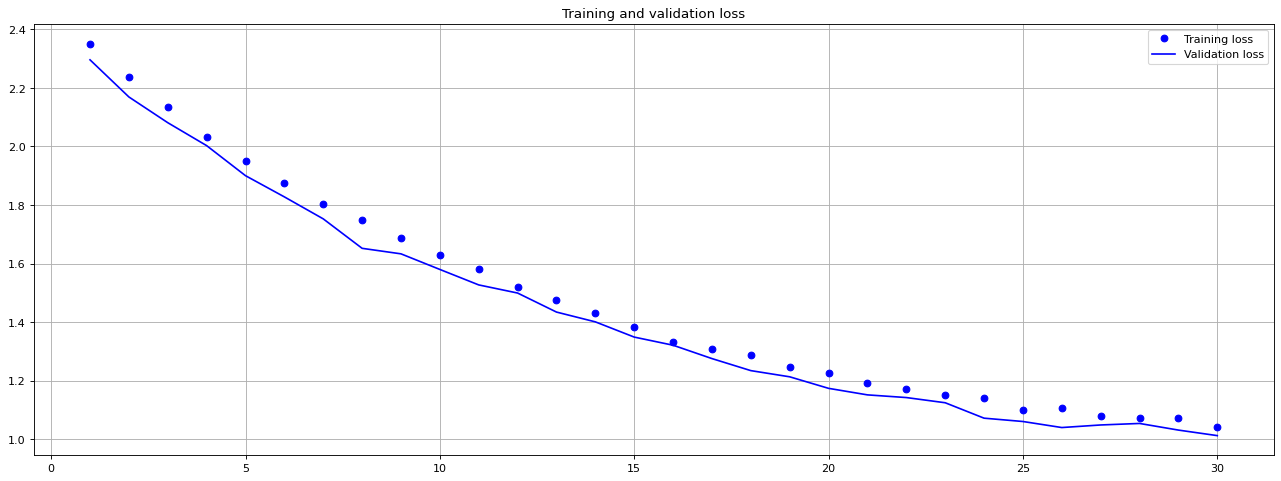

In [32]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()


In [33]:
from sklearn.metrics import classification_report
import numpy as np

# Getting predictions for test data
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Classification report
report = classification_report(test_labels, predicted_classes)
print(report)

# Checking accuracy on test data using a generator
test_loss, test_acc = model.evaluate(validation_generator, steps=len(test_images) // 64, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
              precision    recall  f1-score   support

           0       0.60      0.72      0.66      1000
           1       0.96      0.85      0.91      1000
           2       0.60      0.66      0.63      1000
           3       0.74      0.54      0.62      1000
           4       0.48      0.75      0.58      1000
           5       0.87      0.80      0.83      1000
           6       0.48      0.25      0.32      1000
           7       0.81      0.81      0.81      1000
           8       0.74      0.78      0.76      1000
           9       0.83      0.86      0.85      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

156/156 - 1s - 8ms/step - accuracy: 0.7017 - loss: 0.9988
Test accuracy: 0.7017227411270142


In [21]:
model.save("model_VGG16.h5")

# 2. Model retraining

In [34]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

In [35]:
# Unfreeze several top layers in the previously created conv_base
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [36]:
# Define a modified model
modified_model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(1, activation="sigmoid"),
])

In [39]:
# Model compilation
# Changing to sparse_categorical_crossentropy for multiclass classification
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["accuracy"]
)

In [41]:
# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.6872 - loss: 1.0273 - val_accuracy: 0.7031 - val_loss: 0.9907
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6733 - loss: 1.0328 - val_accuracy: 0.7078 - val_loss: 0.9654
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.6887 - loss: 0.9834 - val_accuracy: 0.7063 - val_loss: 0.9734
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7012 - loss: 0.9740 - val_accuracy: 0.7100 - val_loss: 0.9548
Epoch 5/30
 3/50 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.7075 - loss: 0.9337

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.7096 - loss: 0.9581 - val_accuracy: 0.7022 - val_loss: 0.9646
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.7040 - loss: 0.9980 - val_accuracy: 0.7100 - val_loss: 0.9340
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6983 - loss: 0.9559 - val_accuracy: 0.7053 - val_loss: 0.9289
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6871 - loss: 0.9624 - val_accuracy: 0.6825 - val_loss: 0.9923
Epoch 9/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6865 - loss: 0.9578 - val_accuracy: 0.7225 - val_loss: 0.8886
Epoch 10/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6917 - loss: 0.9391 - val_accuracy: 0.7122 - val_loss: 0.8974
Epoch 11/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7040 - loss: 0.9234 - val_accuracy: 0.7175 - val_loss: 0.9021
Epoch 12/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.7150 - loss: 0.8965 - val_accuracy: 0.6975 - val_los

In [ ]:
# Getting predictions for test data
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Classification report generation
report = classification_report(test_labels, predicted_classes)
print(report)

# Checking accuracy on test data using a generator
test_loss, test_acc = model.evaluate(validation_generator, steps=len(test_images) // 64, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1000
           1       0.97      0.88      0.92      1000
           2       0.61      0.71      0.66      1000
           3       0.80      0.54      0.65      1000
           4       0.50      0.76      0.60      1000
           5       0.86      0.87      0.86      1000
           6       0.51      0.29      0.37      1000
           7       0.87      0.80      0.84      1000
           8       0.81      0.84      0.83      1000
           9       0.87      0.88      0.87      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



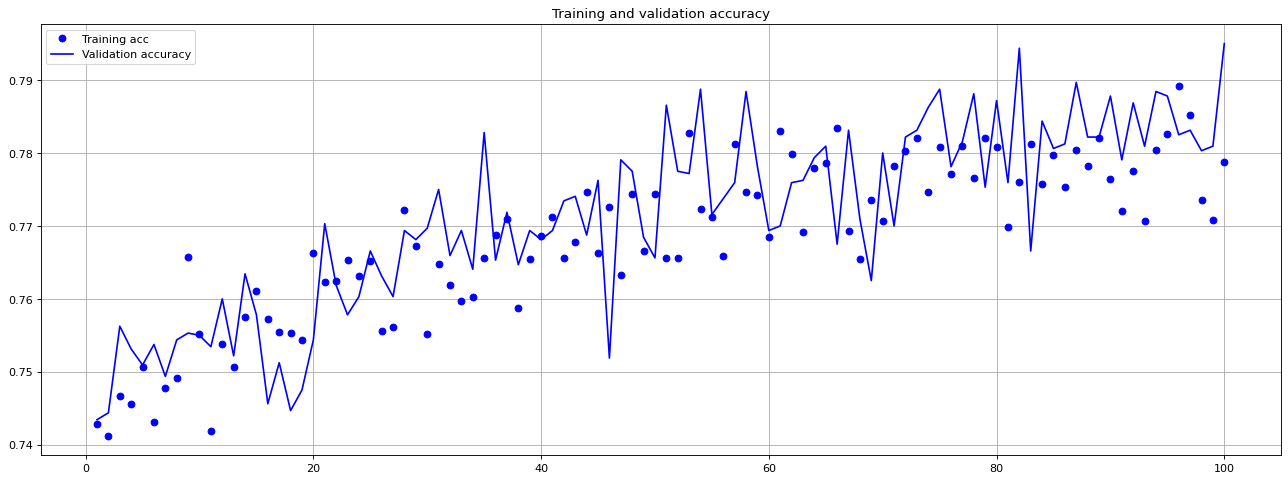

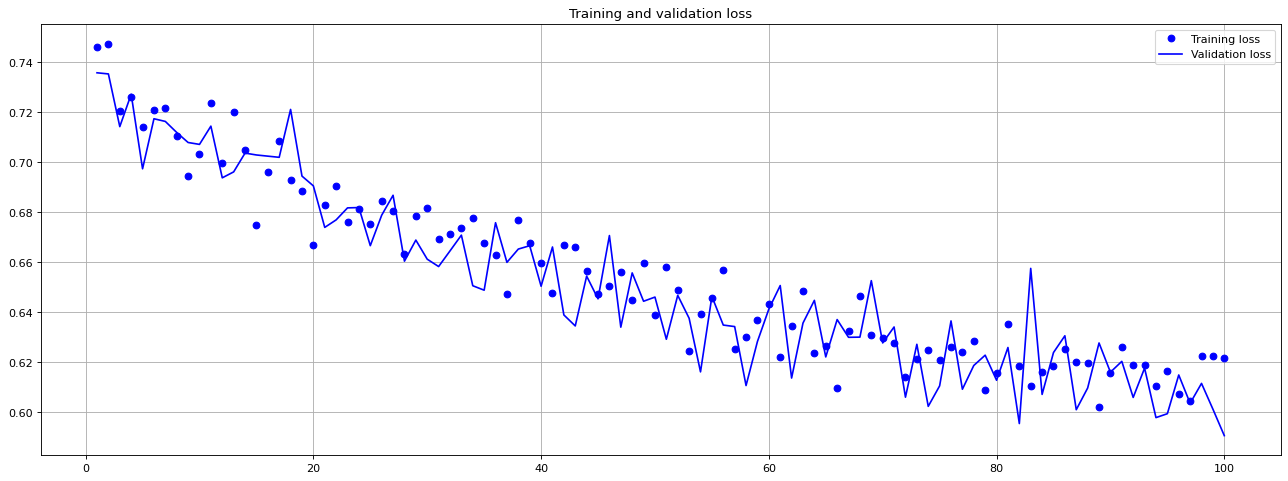

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [ ]:
modified_model.save("modified_model_VGG16.h5")

**Conclusion:** The use of VGG16 as a convolutional basis for the generator algorithm dataset and further training of the created network showed an improvement in accuracy and other quality metrics, but insignificantly. That is, in essence, the training took place on the basis of the already achieved accuracy, but it deteriorated slightly, even taking into account a large number of epochs. It is worth noting that the model, even with such a large number of epochs, did not become overtrained. But it remained with relatively low accuracy indicators - about 0.78.